In [1]:
from aISS import *
from numpy import arange, argsort, array, linspace, meshgrid, pi, set_printoptions, sign, sin
from numpy import c_ as concatenate
from numpy import rint as round_to_integer
from numpy.linalg import norm
from numpy.random import randn, permutation, seed
from matplotlib.pyplot import legend, plot, subplots

In [2]:
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 18})

cont_plot = 0

THIN_LINES = True

if THIN_LINES:
    folder_name = 'output-img-thin'
else:
    folder_name = 'output-img'
    plt.rcParams['lines.linewidth'] = 4

script_name = 'Polynomial-1D'
seed(13)

In [3]:
no_of_basis_functions = 25
order_model = 5 # 5, 20

save_model_name = f'--{order_model}th-order' # 5th-order , 20th-order

true_weights = zeros((no_of_basis_functions+1, 1))


if save_model_name == '--20th-order':
    true_weights[[0, 2, 5, 13, 20]] = array([-1, 5, -3, -3/2, 1/2]).reshape(-1, 1)
if save_model_name == '--5th-order':
    true_weights[[0, 2, 5]] = array([-1, 5, -3]).reshape(-1, 1)

def true_model_function(inputs, save_model_name):
    if save_model_name == '--20th-order':
        return 5 * inputs ** 2 - 3 * inputs ** 5 - 3/2 * inputs ** 13 + 1/2 * inputs ** 20 - 1
    elif save_model_name == '--5th-order':
        return 5 * inputs ** 2 - 3 * inputs ** 5 - 1
    else:
        print("Something wrong happened in 'true_model_function()'.\n\n\n") 


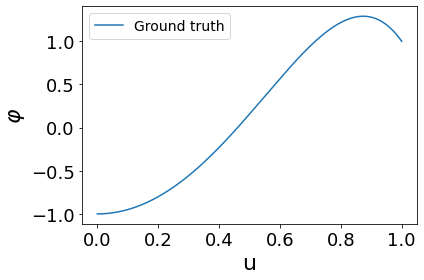

In [4]:
no_of_samples = 1000
inputs = linspace(0, 1, no_of_samples)
true_outputs = true_model_function(inputs, save_model_name)
plot(inputs, true_outputs);
plt.legend(['Ground truth'], fontsize=14)
plt.xlabel('u', fontsize=22)
plt.ylabel(r'$\varphi$', fontsize=22)
plt.savefig(f'{folder_name}/{script_name}-{cont_plot:02d}--true-model{save_model_name}', bbox_inches='tight')
cont_plot+=1

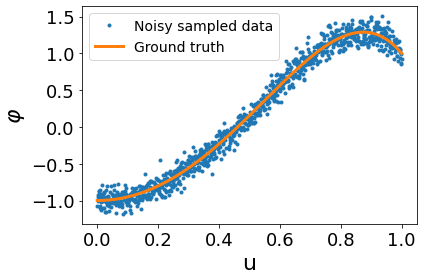

In [5]:
sigma = 0.1
noisy_outputs = true_outputs + sigma * randn(true_outputs.shape[0])
noise_level = norm(true_outputs - noisy_outputs)
plot(inputs, noisy_outputs, '.', inputs, true_outputs, linewidth=3);
plt.legend(['Noisy sampled data', 'Ground truth'], fontsize=14)
plt.xlabel('u', fontsize=22)
plt.ylabel(r'$\varphi$', fontsize=22)
plt.savefig(f'{folder_name}/{script_name}-{cont_plot:02d}--noisy-output{save_model_name}', bbox_inches='tight')
cont_plot+=1

In [6]:
noise_level = norm(true_outputs - noisy_outputs)
print(noise_level)

3.1145297482659386


In [7]:
def split_samples(inputs, outputs, ratio=0.5):
    no_of_total_samples = len(inputs)
    indices = permutation(no_of_total_samples)
    no_of_training_samples = int(round_to_integer(ratio * no_of_total_samples))
    #no_of_validation_samples = no_of_total_samples - no_of_training_samples
    
    ### Sampling ###
    training_inputs, training_outputs = [variable[indices[:no_of_training_samples]] for variable in \
                                         [inputs, outputs]]
    validation_inputs, validation_outputs = [variable[indices[no_of_training_samples:]] for variable in \
                                             [inputs, outputs]]
    
    ### Sorting ###
    training_indices, validation_indices = [argsort(variable) for variable in \
                                            [training_inputs, validation_inputs]]
    training_inputs, training_outputs = [variable[training_indices] for variable in \
                                         [training_inputs, training_outputs]]
    validation_inputs, validation_outputs = [variable[validation_indices] for variable in \
                                         [validation_inputs, validation_outputs]]
    
    return [training_inputs, training_outputs], [validation_inputs, validation_outputs]

In [8]:
training, validation = split_samples(inputs, noisy_outputs, ratio=0.05)

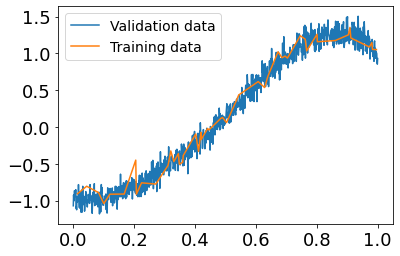

In [9]:
plot(validation[0], validation[1], training[0], training[1])
legend(['Validation data', 'Training data'], fontsize=14);
plt.savefig(f'{folder_name}/{script_name}-{cont_plot:02d}--valid-train{save_model_name}', bbox_inches='tight')
cont_plot+=1

In [10]:
def polynomial_basis_matrix(inputs, degree=0):
    matrix = inputs ** 0
    for counter in range(degree):
        matrix = concatenate[matrix, (inputs ** (1 + counter))]
    return matrix

In [11]:
training[0].reshape(-1, 1).shape

training_matrix = polynomial_basis_matrix(training[0].reshape(-1, 1), no_of_basis_functions)
training_matrix[0:4,0:4]

array([[1.00000000e+00, 1.40140140e-02, 1.96392589e-04, 2.75224849e-06],
       [1.00000000e+00, 4.40440440e-02, 1.93987782e-03, 8.54400640e-05],
       [1.00000000e+00, 8.30830831e-02, 6.90279869e-03, 5.73505797e-04],
       [1.00000000e+00, 1.00100100e-01, 1.00200300e-02, 1.00300601e-03]])

In [12]:
training[1].reshape(-1, 1).shape

(50, 1)

In [13]:
training_matrix = polynomial_basis_matrix(training[0].reshape(-1, 1), no_of_basis_functions)
example_weights = fista(training_matrix, training[1].reshape(-1, 1), regularisation_parameter=0.05)

Iteration no. 1, optimality criterion: 197.12668694210677
Iteration no. 2, optimality criterion: 177.3206970687348
Iteration no. 3, optimality criterion: 160.963291055165
Iteration no. 4, optimality criterion: 147.41639482393794
Iteration no. 5, optimality criterion: 135.5933221647275
Iteration no. 6, optimality criterion: 124.64248361362343
Iteration no. 7, optimality criterion: 114.01754115424053
Iteration no. 8, optimality criterion: 103.47411720047361
Iteration no. 9, optimality criterion: 92.99968897014054
Iteration no. 10, optimality criterion: 82.69759199098846
Iteration no. 11, optimality criterion: 72.71936364171046
Iteration no. 12, optimality criterion: 63.206609568138596
Iteration no. 13, optimality criterion: 54.30550189036142
Iteration no. 14, optimality criterion: 46.122904570265575
Iteration no. 15, optimality criterion: 38.760565603667565
Iteration no. 16, optimality criterion: 32.36025616190838
Iteration no. 17, optimality criterion: 26.94770460720895
Iteration no. 18

Iteration no. 2217, optimality criterion: 0.0009438398357069423
Iteration no. 2218, optimality criterion: 0.0009920564535522889
Iteration no. 2219, optimality criterion: 0.001103863536653714
Iteration no. 2220, optimality criterion: 0.0012570212382143123
Iteration no. 2221, optimality criterion: 0.0014326094354467156
Iteration no. 2222, optimality criterion: 0.001617541036338796
Iteration no. 2223, optimality criterion: 0.0018032447473319939
Iteration no. 2224, optimality criterion: 0.001984029963644866
Iteration no. 2225, optimality criterion: 0.0021559750316330396
Iteration no. 2226, optimality criterion: 0.0023162713179742615
Iteration no. 2227, optimality criterion: 0.0024628488952725966
Iteration no. 2228, optimality criterion: 0.002594162266540938
Iteration no. 2229, optimality criterion: 0.0027090659667584997
Iteration no. 2230, optimality criterion: 0.0028067413908333017
Iteration no. 2231, optimality criterion: 0.0028866536062240686
Iteration no. 2232, optimality criterion: 0.

Iteration no. 4900, optimality criterion: 0.0006873622852481159
Iteration no. 4901, optimality criterion: 0.0006868541132902564
Iteration no. 4902, optimality criterion: 0.0006861186125605571
Iteration no. 4903, optimality criterion: 0.0006851562877813123
Iteration no. 4904, optimality criterion: 0.0006839677182949473
Iteration no. 4905, optimality criterion: 0.0006825535577765546
Iteration no. 4906, optimality criterion: 0.0006809145339232886
Iteration no. 4907, optimality criterion: 0.0006790514481460591
Iteration no. 4908, optimality criterion: 0.0006769651752051219
Iteration no. 4909, optimality criterion: 0.000674656662843384
Iteration no. 4910, optimality criterion: 0.0006721269313862332
Iteration no. 4911, optimality criterion: 0.0006693770733161208
Iteration no. 4912, optimality criterion: 0.000666408252843076
Iteration no. 4913, optimality criterion: 0.0006632217054182571
Iteration no. 4914, optimality criterion: 0.0006598187372534974
Iteration no. 4915, optimality criterion: 

Iteration no. 7355, optimality criterion: 0.00015040008930096525
Iteration no. 7356, optimality criterion: 0.00014782647107553754
Iteration no. 7357, optimality criterion: 0.0001452060535210901
Iteration no. 7358, optimality criterion: 0.00014253974690322006
Iteration no. 7359, optimality criterion: 0.00013982847591801918
Iteration no. 7360, optimality criterion: 0.00013707317936164414
Iteration no. 7361, optimality criterion: 0.00013427480982185658
Iteration no. 7362, optimality criterion: 0.00013143433332386787
Iteration no. 7363, optimality criterion: 0.00012855272902156811
Iteration no. 7364, optimality criterion: 0.0001256309888523309
Iteration no. 7365, optimality criterion: 0.00012267011720183652
Iteration no. 7366, optimality criterion: 0.00011967113054559152
Iteration no. 7367, optimality criterion: 0.00011663505712289861
Iteration no. 7368, optimality criterion: 0.00011356293656974413
Iteration no. 7369, optimality criterion: 0.00011045581956633899
Iteration no. 7370, optimal

Iteration no. 9829, optimality criterion: 1.8671749903082242e-05
Iteration no. 9830, optimality criterion: 1.9992070100929982e-05
Iteration no. 9831, optimality criterion: 2.1304781503870415e-05
Iteration no. 9832, optimality criterion: 2.260945420832276e-05
Iteration no. 9833, optimality criterion: 2.39056612832193e-05
Iteration no. 9834, optimality criterion: 2.5192978928380623e-05
Iteration no. 9835, optimality criterion: 2.647098660190444e-05
Iteration no. 9836, optimality criterion: 2.7739267163531803e-05
Iteration no. 9837, optimality criterion: 2.8997407004719973e-05
Iteration no. 9838, optimality criterion: 3.02449961901073e-05
Iteration no. 9839, optimality criterion: 3.1481628581628675e-05
Iteration no. 9840, optimality criterion: 3.2706901980771406e-05
Iteration no. 9841, optimality criterion: 3.392041825522887e-05
Iteration no. 9842, optimality criterion: 3.5121783460771856e-05
Iteration no. 9843, optimality criterion: 3.631060797568561e-05
Iteration no. 9844, optimality cr

Iteration no. 12172, optimality criterion: 2.8928741987268686e-05
Iteration no. 12173, optimality criterion: 2.8612849135283612e-05
Iteration no. 12174, optimality criterion: 2.8287670536926096e-05
Iteration no. 12175, optimality criterion: 2.7953320215012426e-05
Iteration no. 12176, optimality criterion: 2.7609915152847382e-05
Iteration no. 12177, optimality criterion: 2.7257575277110786e-05
Iteration no. 12178, optimality criterion: 2.689642338479558e-05
Iteration no. 12179, optimality criterion: 2.6526585120613663e-05
Iteration no. 12180, optimality criterion: 2.6148188928318334e-05
Iteration no. 12181, optimality criterion: 2.5761366005798436e-05
Iteration no. 12182, optimality criterion: 2.53662502595446e-05
Iteration no. 12183, optimality criterion: 2.496297826141168e-05
Iteration no. 12184, optimality criterion: 2.4551689195775214e-05
Iteration no. 12185, optimality criterion: 2.4132524818782642e-05
Iteration no. 12186, optimality criterion: 2.3705629397651867e-05
Iteration no. 

In [14]:
example_weights.shape

(26, 1)

[[-1.00145006  0.68656031  3.24180193  0.          0.          0.
   0.         -1.94419129  0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.        ]]


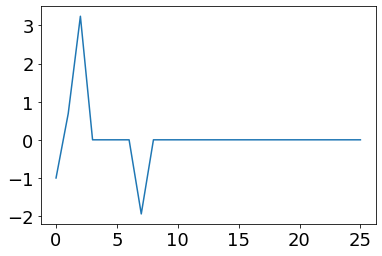

In [15]:
example_weights[absval(example_weights) < 10**(-8)] = 0
print(example_weights.T)
plot(example_weights);

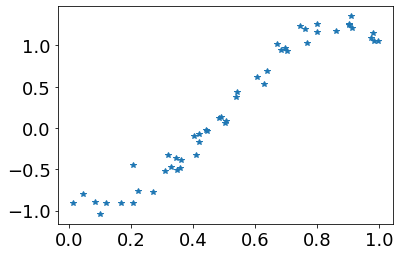

In [16]:
plot(training[0], training[1], '*');

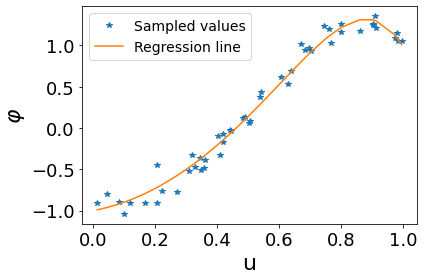

In [17]:
plot(training[0], training[1], '*', training[0], training_matrix @ example_weights);
plt.legend(['Sampled values', 'Regression line'], fontsize=14)
plt.xlabel('u', fontsize=22)
plt.ylabel(r'$\varphi$', fontsize=22)
plt.savefig(f'{folder_name}/{script_name}-{cont_plot:02d}--reconstruction{save_model_name}', bbox_inches='tight')
cont_plot+=1

In [18]:
cont_plot

4

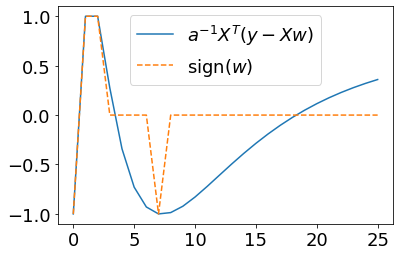

In [19]:
plot(1/0.05 * training_matrix.T @ (training[1].reshape(-1, 1) - training_matrix @ example_weights));
plot(sign(example_weights), '--');
legend(['$a^{-1} X^{T} (y - X w)$', 'sign$(w)$']);
plt.savefig(f'{folder_name}/{script_name}-{cont_plot:02d}--comparison-sign-w{save_model_name}', bbox_inches='tight')
cont_plot+=1

In [20]:
validation_matrix = polynomial_basis_matrix(validation[0].reshape(-1, 1), no_of_basis_functions)
noise_level = 1/2 * nsum((true_model_function(validation[0], save_model_name) - validation[1]) ** 2)
optimal_weights = adaptive_inverse_scale_space_method(validation_matrix, validation[1].reshape(-1, 1), \
                                                      noise_level)

Iteration 1 with discrepancy 209.70089467267127.
Iteration 2 with discrepancy 154.8638724818863.
Iteration 3 with discrepancy 17.844094992165566.
Iteration 4 with discrepancy 7.610843135306881.
Iteration 5 with discrepancy 7.298119599060193.
Iteration 6 with discrepancy 6.971419097558481.
Iteration 7 with discrepancy 6.632032935607086.
Iteration 8 with discrepancy 6.282557252485677.
Iteration 9 with discrepancy 5.927635663253049.
Iteration 10 with discrepancy 5.575120311147732.
Iteration 11 with discrepancy 5.237904452535942.
Iteration 12 with discrepancy 4.9368518565869515.
Iteration 13 with discrepancy 4.7055645113726.
Iteration 14 with discrepancy 4.657011611782283.
Iteration 15 with discrepancy 4.6544506561790415.
Iteration 16 with discrepancy 4.6517554576515066.
Iteration 17 with discrepancy 4.6489243309502575.
Iteration 18 with discrepancy 4.600180848178986.
Iteration completed after 18 iterations with discrepancy 4.600180848178986.


In [21]:
optimal_weights[absval(optimal_weights) < 10**(-10)] = 0
print(optimal_weights.T)
print(optimal_weights[6])

[[-1.00582262  0.          5.01451065  0.          0.         -2.92655802
  -0.09859043  0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.        ]]
[-0.09859043]


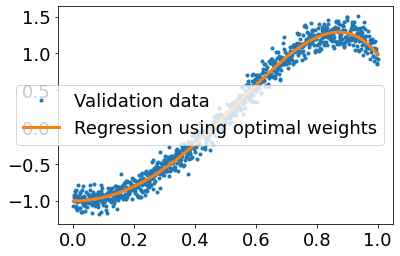

In [22]:
plot(validation[0], validation[1], '.', validation[0], validation_matrix @ optimal_weights, linewidth=3);
legend(['Validation data', 'Regression using optimal weights']);
plt.savefig(f'{folder_name}/{script_name}-{cont_plot:02d}--validation-reconstruction{save_model_name}', bbox_inches='tight')
cont_plot+=1

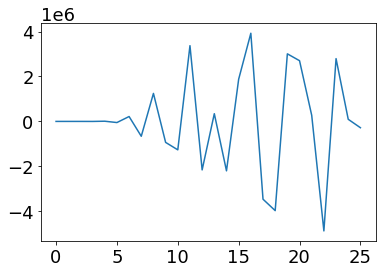

In [23]:
test = solve(validation_matrix.T @ validation_matrix, validation_matrix.T @ validation[1])
plot(test);
plt.savefig(f'{folder_name}/{script_name}-{cont_plot:02d}--inverse-prob-validation{save_model_name}', bbox_inches='tight')
cont_plot+=1

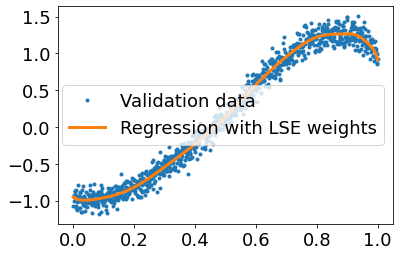

In [24]:
plot(validation[0], validation[1], '.', validation[0], validation_matrix @ test, linewidth=3);
legend(['Validation data', 'Regression with LSE weights']);
plt.savefig(f'{folder_name}/{script_name}-{cont_plot:02d}--reconstruction-validation{save_model_name}', bbox_inches='tight')
cont_plot+=1

In [25]:
print(norm(optimal_weights, 1), '\n\n', norm(true_weights, 1))

9.04548171544252 

 9.0


In [26]:
print(1/2*nsum((validation_matrix @ optimal_weights - validation[1].reshape(-1, 1)) ** 2), '\n\n', \
      1/2*nsum((validation_matrix @ true_weights - validation[1].reshape(-1, 1)) ** 2))

4.6001808481790665 

 4.610068809336941


In [27]:
def soft_thresholding(argument, threshold):
    return sign(argument) * maximum(absval(argument) - threshold, 0)

# Estimate the source condition element

In [28]:
def estimate_source_condition_elements(matrix, weights, maximum_no_of_iterations=200000000, tolerance=10**(-12), \
                                      acceleration=True):
    step_size = 1.99/(norm(matrix, 2) ** 2)
    adaptive_step_size = 0
    sc_element = zeros((matrix.shape[0], 1))
    previous_sc_element = copy(sc_element)
    gradient_value = infinity
    counter = 0
    while (counter < maximum_no_of_iterations) and (gradient_value > tolerance):  
        argument = (1 + adaptive_step_size) * sc_element - adaptive_step_size * previous_sc_element
        gradient = matrix @ (soft_thresholding(weights + matrix.T @ argument, 1) - weights)
        gradient_value = norm(gradient.reshape(-1))
        counter += 1
        previous_sc_element = copy(sc_element)
        sc_element = argument - step_size * gradient.reshape(-1, 1)
        
        if acceleration == True:
            adaptive_step_size = (counter - 1)/(counter + 3)
    
    print("Iteration completed after {i} iterations with norm of gradient {g}.".format(i = counter, \
                                                                                    g = gradient_value))
    return sc_element

In [29]:
sc_element = estimate_source_condition_elements(training_matrix, true_weights)

Iteration completed after 5555 iterations with norm of gradient 9.289215152921456e-13.


In [30]:
training_matrix.shape

(50, 26)

The norm of sc_element is 15.327457817190666.


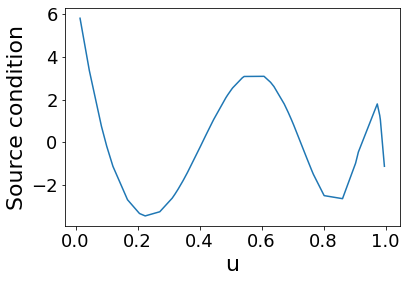

In [31]:
plot(training[0], sc_element)
print("The norm of sc_element is {n}.".format(n = norm(sc_element)));
plt.xlabel('u', fontsize=22)
plt.ylabel('Source condition', fontsize=22)
plt.savefig(f'{folder_name}/{script_name}-{cont_plot:02d}--norm-source-cond{save_model_name}', bbox_inches='tight')
cont_plot+=1

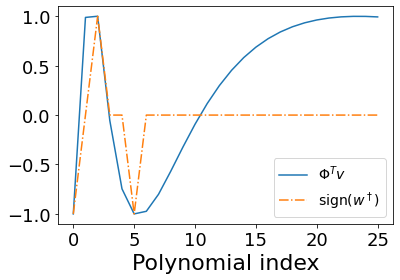

In [32]:
plot(linspace(0, no_of_basis_functions, 1 + no_of_basis_functions), training_matrix.T @ sc_element, \
    linspace(0, no_of_basis_functions, 1 + no_of_basis_functions), sign(true_weights), '-.')
legend(['$\Phi^{T} v$', 'sign$(w^\dagger)$'], fontsize=14);
plt.xlabel('Polynomial index', fontsize=22)
plt.savefig(f'{folder_name}/{script_name}-{cont_plot:02d}--comparison-sign-w{save_model_name}', bbox_inches='tight')
cont_plot+=1

In [33]:
# The printed values of 1st-2nd rows and 3rd-4th rows should be the same
import numpy 

test_Xtv = training_matrix.T @ sc_element

print("Indices of values equal to 1")
print(numpy.where(test_Xtv >= 0.9999)[0])
print(numpy.where(sign(true_weights)==1)[0])

print("Indices of values equal to -1")
print(numpy.where(-test_Xtv >= 0.9999)[0])
print(numpy.where(sign(true_weights)==-1)[0])


Indices of values equal to 1
[2]
[2]
Indices of values equal to -1
[0 5]
[0 5]


15.327457817190666
4.610068809336941


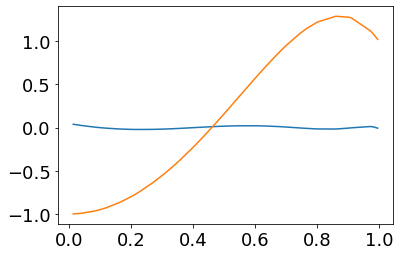

In [34]:
print(norm(sc_element))
print(noise_level)
plt.plot(training[0], sigma / norm(sc_element)*sc_element)
plt.plot(training[0], training_matrix @ true_weights)

In [35]:
parameter = sigma / norm(sc_element)
print(parameter)

0.006524239126454746


Optimal regularisation parameter for error estimates is alpha = 0.006524239126454746 with error bound 70.66063520945836.


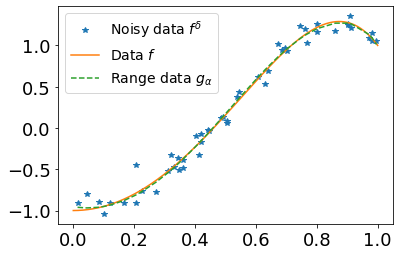

In [36]:
parameter = sigma / norm(sc_element)
print("Optimal regularisation parameter for error estimates is alpha = {a} with error bound {e}.".format(a = \
                parameter, e = noise_level * norm(sc_element)))
range_data = parameter * sc_element + training_matrix @ true_weights
plot(training[0], training[1], '*', inputs, true_outputs, training[0], range_data, '--') 
legend([r'Noisy data $f^{\delta}$', 'Data $f$', 'Range data $g_{\\alpha}$'], fontsize=14);
plt.savefig(f'{folder_name}/{script_name}-{cont_plot:02d}--train-vs-range{save_model_name}', bbox_inches='tight')
cont_plot+=1

In [37]:
#FISTA test
test_weights = fista(training_matrix, range_data, parameter)

Iteration no. 1, optimality criterion: 1568.029387515579
Iteration no. 2, optimality criterion: 1410.2526003083574
Iteration no. 3, optimality criterion: 1280.7871396984708
Iteration no. 4, optimality criterion: 1175.1416142479352
Iteration no. 5, optimality criterion: 1084.1425964756465
Iteration no. 6, optimality criterion: 999.4298943007149
Iteration no. 7, optimality criterion: 915.9990021970723
Iteration no. 8, optimality criterion: 832.1097575258655
Iteration no. 9, optimality criterion: 748.0946947593544
Iteration no. 10, optimality criterion: 665.1657561992051
Iteration no. 11, optimality criterion: 584.6933367536669
Iteration no. 12, optimality criterion: 507.9347627367814
Iteration no. 13, optimality criterion: 436.0014509364163
Iteration no. 14, optimality criterion: 369.9051369675134
Iteration no. 15, optimality criterion: 310.6396136890148
Iteration no. 16, optimality criterion: 259.2315021196531
Iteration no. 17, optimality criterion: 216.4541117113057
Iteration no. 18, o

Iteration no. 2727, optimality criterion: 0.04272329670885524
Iteration no. 2728, optimality criterion: 0.04305175970732759
Iteration no. 2729, optimality criterion: 0.04331991349606336
Iteration no. 2730, optimality criterion: 0.043585426268368636
Iteration no. 2731, optimality criterion: 0.043803244291824125
Iteration no. 2732, optimality criterion: 0.043867468937916806
Iteration no. 2733, optimality criterion: 0.043685826999244726
Iteration no. 2734, optimality criterion: 0.04322914963043326
Iteration no. 2735, optimality criterion: 0.042543117935857896
Iteration no. 2736, optimality criterion: 0.041715610263207845
Iteration no. 2737, optimality criterion: 0.04085158070734202
Iteration no. 2738, optimality criterion: 0.04005996542752715
Iteration no. 2739, optimality criterion: 0.03942846474197774
Iteration no. 2740, optimality criterion: 0.038995813976696665
Iteration no. 2741, optimality criterion: 0.038753602040961475
Iteration no. 2742, optimality criterion: 0.03860157766945555


Iteration no. 5588, optimality criterion: 0.00021652801113472198
Iteration no. 5589, optimality criterion: 0.0001932573786665393
Iteration no. 5590, optimality criterion: 0.0001696067280253333
Iteration no. 5591, optimality criterion: 0.000145632397589779
Iteration no. 5592, optimality criterion: 0.00012139130898838169
Iteration no. 5593, optimality criterion: 9.694083276200298e-05
Iteration no. 5594, optimality criterion: 7.233865333672658e-05
Iteration no. 5595, optimality criterion: 4.7642633153255034e-05
Iteration no. 5596, optimality criterion: 2.291067754563887e-05
Iteration no. 5597, optimality criterion: 1.799401149670024e-06
Iteration no. 5598, optimality criterion: 2.643001685584821e-05
Iteration no. 5599, optimality criterion: 5.092394541291527e-05
Iteration no. 5600, optimality criterion: 7.52244551517023e-05
Iteration no. 5601, optimality criterion: 9.927543855730413e-05
Iteration no. 5602, optimality criterion: 0.000123021541221626
Iteration no. 5603, optimality criterion

Iteration no. 8088, optimality criterion: 1.117502656782965e-05
Iteration no. 8089, optimality criterion: 1.1497044691205538e-05
Iteration no. 8090, optimality criterion: 1.1791326999740297e-05
Iteration no. 8091, optimality criterion: 1.2057265187953971e-05
Iteration no. 8092, optimality criterion: 1.2294318913023881e-05
Iteration no. 8093, optimality criterion: 1.2502016746628012e-05
Iteration no. 8094, optimality criterion: 1.267995700202924e-05
Iteration no. 8095, optimality criterion: 1.2827808622879716e-05
Iteration no. 8096, optimality criterion: 1.294531163157397e-05
Iteration no. 8097, optimality criterion: 1.3032277727019916e-05
Iteration no. 8098, optimality criterion: 1.3088590256024927e-05
Iteration no. 8099, optimality criterion: 1.3114204441622042e-05
Iteration no. 8100, optimality criterion: 1.310914722706477e-05
Iteration no. 8101, optimality criterion: 1.307351706413854e-05
Iteration no. 8102, optimality criterion: 1.300748356313724e-05
Iteration no. 8103, optimality 

In [38]:
print(test_weights.reshape(-1), '\n\n', true_weights.reshape(-1))

[-1.  0.  5. -0. -0. -3. -0. -0. -0. -0. -0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.] 

 [-1.  0.  5.  0.  0. -3.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.]


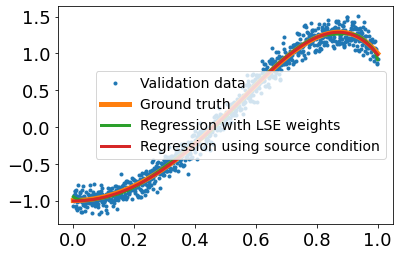

In [39]:
plot(validation[0], validation[1], '.')
plot(validation[0], true_model_function(validation[0], save_model_name), linewidth=5)
plot(validation[0], validation_matrix @ test, linewidth=3);
plot(validation[0], validation_matrix @ optimal_weights, linewidth=3);
legend(['Validation data', 'Ground truth', 'Regression with LSE weights', 'Regression using source condition'], fontsize=14);
plt.savefig(f'{folder_name}/{script_name}-{cont_plot:02d}--comparison_reconstructions{save_model_name}', bbox_inches='tight')
cont_plot+=1

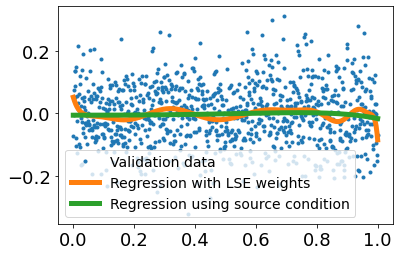

In [40]:
plot(validation[0], (validation[1]-true_model_function(validation[0], save_model_name)).reshape(-11), '.')
plot(validation[0], ((validation_matrix @ test)-true_model_function(validation[0], save_model_name)).reshape(-1), linewidth=5);
plot(validation[0], ((validation_matrix @ optimal_weights).reshape(-1) - true_model_function(validation[0], save_model_name)), linewidth=5);
legend(['Validation data', 'Regression with LSE weights', 'Regression using source condition'], fontsize=14);
plt.savefig(f'{folder_name}/{script_name}-{cont_plot:02d}--comparison-reconstructions-centered{save_model_name}', bbox_inches='tight')
cont_plot+=1

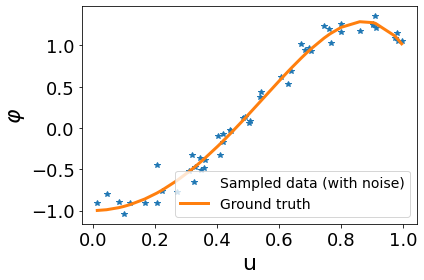

In [41]:
plot(training[0], training[1], '*', training[0], true_model_function(training[0], save_model_name), linewidth=3);
plt.legend(['Sampled data (with noise)', 'Ground truth'], fontsize=14)
plt.xlabel('u', fontsize=22)
plt.ylabel(r'$\varphi$', fontsize=22)
plt.savefig(f'{folder_name}/{script_name}-{cont_plot:02d}--reconstruction{save_model_name}', bbox_inches='tight')
cont_plot+=1